In [4]:
import sys
import logging
import os

%load_ext autoreload
%autoreload

sys.path.insert(0, '../')
logger = logging.getLogger()
logger.setLevel(logging.INFO)

import pandas as pd
import matplotlib.pyplot as plt

from lib.visualization import visualize as viz
from lib.features import accidents as acc, drivers
from lib.data.accidents import loaders as acc_loaders
from lib import utils, stats

get_path_raw = '../data/raw/accidents/{}.csv'.format
get_path_interim = '../data/interim/accidents/{}.csv'.format

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Sécrurité routière en france - exploration

## Chargement et nettoyage des données

In [9]:
specs = [
    ('caracs', acc.clean_caracs_dataset),
    ('users', acc.clean_users_dataset),
    ('vehicles', acc.clean_vehicles_dataset),
    ('locations', acc.clean_locations_dataset),
]


def is_file_exists(file_name: str) -> bool:
    if os.path.exists(file_name):
        print('file {} already exists'.format(file_name))
        return True
    return False


def write_raw_datasets():
    for name, *_ in specs:
        file_name = get_path_raw(name)
        if not is_file_exists(file_name):
            raw_df = acc_loaders.get_raw_dataset(name)
            print('write {}: {} lines'.format(file_name, raw_df.shape[0]))
            raw_df.to_csv(file_name, sep=';', header=True, index=False)


def write_clean_dataset(data_name: str, func) -> None:
    out_path = get_path_interim(data_name)
    if not is_file_exists(out_path):
        dtypes = acc_loaders.dtypes(data_name)
        df = utils.get_dataset(get_path_raw(data_name), dtypes)
        df = func(df)
        print('write {}: {} lines'.format(data_name, df.shape[0]))
        df.to_csv(out_path, header=True, index=False, sep=';')


write_raw_datasets()

for name, func in specs:
    write_clean_dataset(name, func)

file ../data/raw/accidents/caracs.csv already exists
file ../data/raw/accidents/users.csv already exists
file ../data/raw/accidents/vehicles.csv already exists
file ../data/raw/accidents/locations.csv already exists


C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (4,6,7,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['Num_Acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long', 'gps'],
      dtype='object')


INFO:root:../data/raw/accidents/caracs.csv: 236756 lines loaded (16.72)Mb


write caracs: 236756 lines


C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (1,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['Num_Acc', 'id_vehicule', 'num_veh', 'place', 'catu', 'grav', 'sexe',
       'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp', 'etatp',
       'secu'],
      dtype='object')


INFO:root:../data/raw/accidents/users.csv: 532589 lines loaded (20.83)Mb


write users: 532589 lines


C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['Num_Acc', 'id_vehicule', 'num_veh', 'senc', 'catv', 'obs', 'obsm',
       'choc', 'manv', 'motor', 'occutc'],
      dtype='object')


INFO:root:../data/raw/accidents/vehicles.csv: 405056 lines loaded (13.91)Mb


write vehicles: 405056 lines


C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (2,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['Num_Acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'vosp', 'prof',
       'pr', 'pr1', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ',
       'vma', 'env1'],
      dtype='object')


INFO:root:../data/raw/accidents/locations.csv: 236756 lines loaded (20.32)Mb


write locations: 236756 lines


## Questions

### Combien de personnes sont tuées sur les routes tous les ans ?

In [27]:
users = utils.get_dataset(get_path_interim('users'), acc.dtypes('users'))
caracs = utils.get_dataset(get_path_interim('caracs'), acc.dtypes('caracs'))

victims = acc.build_victims_dataset(caracs, users)
bilan, fig = viz.plot_killed(victims)

C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning:

Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.

INFO:root:../data/interim/accidents/users.csv: 532589 lines loaded (14.73)Mb
C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning:

Columns (5,6,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.

INFO:root:../data/interim/accidents/caracs.csv: 236756 lines loaded (18.52)Mb


### Nombre de personnes blessées ou tuées au fils des ans sur la RCEA

In [14]:
users = utils.get_dataset(get_path_interim('users'), acc.dtypes('users'))
caracs = utils.get_dataset(get_path_interim('caracs'), acc.dtypes('caracs'))
locations = utils.get_dataset(get_path_interim('locations'), acc.dtypes('locations'))

C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning:

Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.

INFO:root:../data/interim/accidents/users.csv: 532589 lines loaded (14.73)Mb
C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning:

Columns (5,6,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.

INFO:root:../data/interim/accidents/caracs.csv: 236756 lines loaded (18.52)Mb
INFO:root:../data/interim/accidents/locations.csv: 236756 lines loaded (8.36)Mb


Sources pour la liste des tronçons de la RCEA :

- https://fr.wikipedia.org/wiki/Route_Centre-Europe_Atlantique
- https://routes.fandom.com/wiki/RCEA
- https://routes.fandom.com/wiki/RCEA_Branche_Nord-Est_(Itin%C3%A9raire)
- https://routes.fandom.com/wiki/RCEA_Branche_Sud-Est_(Itin%C3%A9raire)
- https://routes.fandom.com/wiki/RCEA_Branche_centrale_(Itin%C3%A9raire)
- https://routes.fandom.com/wiki/RCEA_Branche_Nord-Ouest_(Itin%C3%A9raire)
- https://routes.fandom.com/wiki/RCEA_Branche_Sud-Ouest_(Itin%C3%A9raire)

In [15]:
RCEA = [
    'RCEA',

    # nord-est
    'N\s*70',
    'N\s*80',
    'A\s*6',
    'A\s*36',
    'A\s*31',

    # sud est
    'N\s*79',
    'A\s*40',
    'A\s*406',
    'N\s*205',

    # centre
    'N\s*145',
    'A\s*714',
    'A\s*71',

    # nord-ouest
    'N\s*149',
    'N\s*147',
    'N\s*249',

    # sud-ouest
    'A\s*837',
    'A\s*10',
    'N\s*141',
    'N\s*150',
    'N\s*520',
    'A\s*20',
    'D\s*137',
]
RCEA_regex = '|'.join(RCEA)

acc_located = pd.merge(caracs, locations, on='Num_Acc', how='inner')
victims_loc = pd.merge(acc_located, users, on='Num_Acc', how='inner')
vict_rcea = victims_loc.loc[victims_loc['adr'].str.contains(
    RCEA_regex, regex=True, case=False), :]

fig = viz.plot_bilan(vict_rcea)

In [16]:
import plotly.express as px

rcea_year_grav = vict_rcea\
    .groupby(by=['year', 'grav']).count().reset_index()\
    .loc[:, ['year', 'grav', 'Num_Acc']]\
    .rename(columns={'Num_Acc': 'victims'})
rcea_year_grav = rcea_year_grav.loc[rcea_year_grav['grav'] != 'safe', :]
vict_by_year = rcea_year_grav[['year', 'victims']]\
    .groupby(by=['year']).sum()
vict_by_year = pd.merge(vict_by_year,
                        rcea_year_grav.loc[rcea_year_grav['grav'] == 'killed', 
                                           ['victims', 'year']]\
                        .rename(columns={'victims': 'killed'}),
                        on='year', how='inner')
vict_by_year['grav_rate'] = vict_by_year['killed'] / \
    vict_by_year['victims'] * 100
vict_by_year['grav_rate'] = vict_by_year['grav_rate'].round(2)

fig = px.line(vict_by_year, x='year', y='grav_rate', labels={'grav_rate': 'killed %'},
              title='Pourcentage de tués parmis les accidents corporels sur la RCEA')
fig.show()

### Quelle est la route la plus meurtière de France ?

### Femme au volant, mort au tournant ?

**Bibliographie** :

- [enquête sur la mobilité des personnes, 2008](https://www.statistiques.developpement-durable.gouv.fr/enquete-nationale-transports-et-deplacements-entd-2008)
- (Données non utilisées dans ce notebook) [enquête sur la mobilité des personnes, 2018-2019](https://www.statistiques.developpement-durable.gouv.fr/enquete-sur-la-mobilite-des-personnes-2018-2019) (Résumé [ici](https://www.statistiques.developpement-durable.gouv.fr/comment-les-francais-se-deplacent-ils-en-2019-resultats-de-lenquete-mobilite-des-personnes)) **Les résultats de cette enquête ne seront disponible que début 2021.**
- [recensements de la population de 2006 à 2019 (Insee)](https://www.insee.fr/fr/information/2880845)

In [28]:
users = utils.get_dataset(get_path_interim('users'), acc.dtypes('users'))
caracs = utils.get_dataset(get_path_interim('caracs'), acc.dtypes('caracs'))
pop_sex = utils.get_dataset('../data/interim/pop/pop_sex.csv', sep=',')
entd = pd.read_excel('../data/raw/conducteurs/entd.xlsx',
                     engine='openpyxl', index_col=0, header=0)

victims = acc.build_victims_dataset(caracs, users)

C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning:

Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.

INFO:root:../data/interim/accidents/users.csv: 532589 lines loaded (14.73)Mb
C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning:

Columns (5,6,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.

INFO:root:../data/interim/accidents/caracs.csv: 236756 lines loaded (18.52)Mb
INFO:root:../data/interim/pop/pop_sex.csv: 121 lines loaded (0.00)Mb


#### Evolution des proportions de conducteurs actif selon le sexe

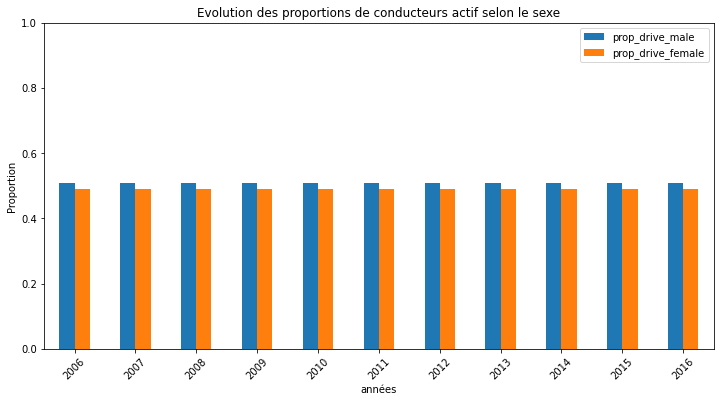

In [331]:
drivers_count = drivers.get_drivers_count(pop_sex, entd)
drivers_count.plot.bar(x='year', ylim=[0, 1], rot=45, xlabel='années', ylabel='Proportion',
                       title='Evolution des proportions de conducteurs actif selon le sexe',
                       figsize=(12, 6))

#### Comparaison H/F de l'implication dans des accidents selon leur gravité

On cherche à déterminer la gravité de chaque accident. Gravité = état du blessé le plus grav impliqué dans l'accident

Puis, on ajoute à ce data frame le sex des conducteurs.

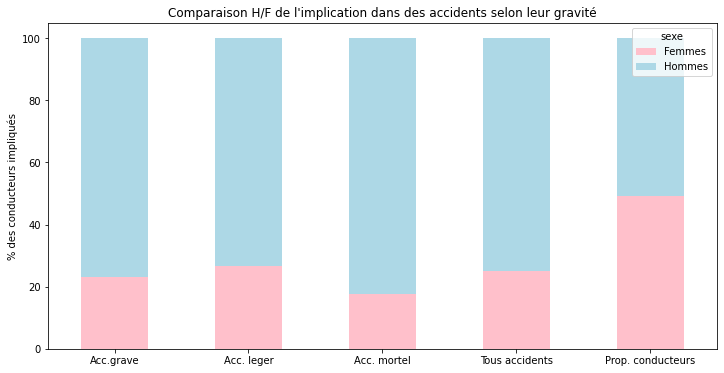

In [332]:
if os.path.exists('../data/interim/accidents/acc_severity.csv'):
        acc_severity = pd.read_csv('../data/interim/accidents/acc_severity.csv',
                                   index_col=0, header=0,
                                   dtype={'acc_severity': 'category', 'Num_Acc': 'string'})
else:
    # !! > 1 minute !!
    acc_severity = get_acc_severity(acc)
    acc_severity.to_csv(
        '../data/interim/accidents/acc_severity.csv', index=True, header=True)

drivers = acc.get_drivers(acc_severity, users)
pct_drivers_sex = acc.get_pct_drivers_by_sex(drivers_count)
summary_sex = acc.get_summary_by_sex(drivers, pct_drivers_sex)
summary_sex.plot.bar(color=['pink', 'lightblue'], figsize=(12, 6), stacked=True,
                     ylabel='% des conducteurs impliqués', rot=0,
                     title="Comparaison H/F de l'implication dans des accidents selon leur gravité")

#### Gravité des accident selon le type de trajet

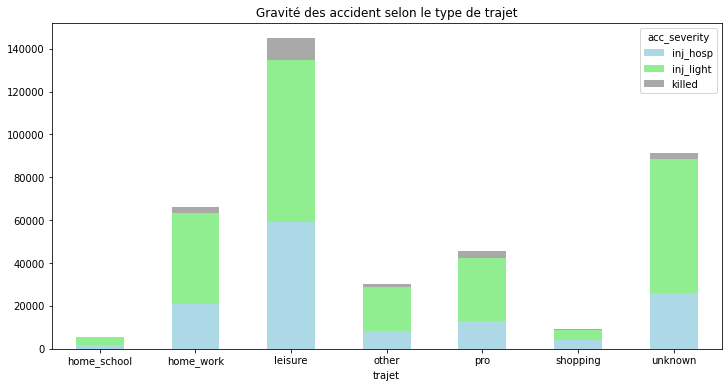

In [333]:
pd.crosstab(index=drivers['trajet'], columns=drivers['acc_severity'])\
    .plot.bar(color=['lightblue', 'lightgreen', 'darkgrey'], figsize=(12, 6), stacked=True, rot=0,
             title='Gravité des accident selon le type de trajet')

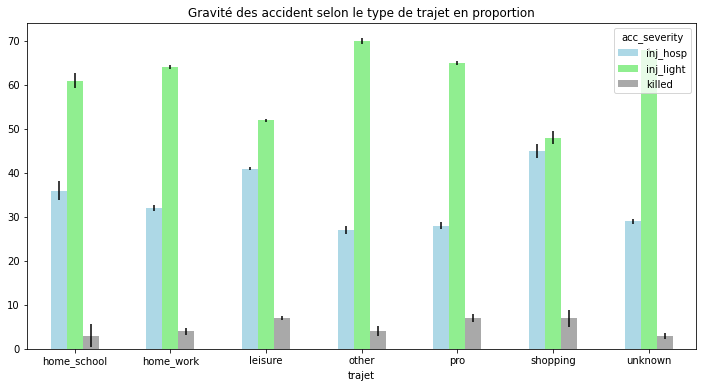

In [334]:
tab_n = pd.crosstab(index=drivers['trajet'], columns=drivers['acc_severity'])
tab_prop = pd.crosstab(index=drivers['trajet'], columns=drivers['acc_severity'], normalize=0)
*_, yerr = stats.compute_prop_ci(tab_prop, tab_n)
yerr = np.transpose(yerr, (1, 0, 2)) * 100

tab_prop\
    .mul(100).round(0)\
    .plot.bar(color=['lightblue', 'lightgreen', 'darkgrey'], figsize=(12, 6), stacked=False, rot=0,
              yerr=yerr, ecolor='black',
             title='Gravité des accident selon le type de trajet en proportion')

#### Proportion d'accident selon le type de trajet et le sex des conducteurs impliqués

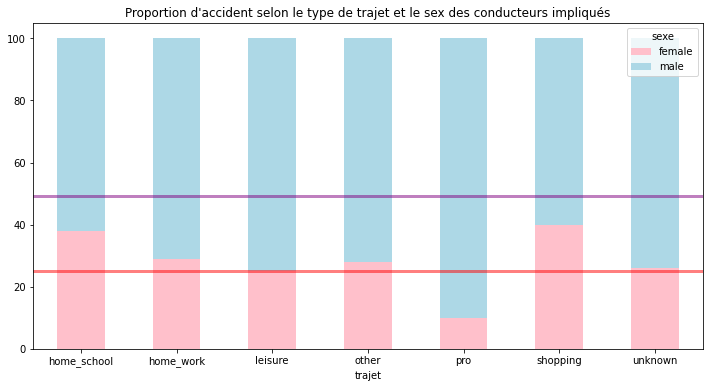

In [335]:
ax = pd.crosstab(index=drivers['trajet'], columns=drivers['sexe'], normalize=0)\
    .mul(100).round(0)\
    .plot.bar(color=['pink', 'lightblue'], figsize=(12, 6), stacked=True, rot=0,
             title="Proportion d'accident selon le type de trajet et le sex des conducteurs impliqués")
ax.axhline(pct_drivers_sex[['prop_drive_female']].values, color='purple', lw=3, alpha=.5)
ax.axhline(summary_sex.loc['Tous accidents', 'Femmes'], color='red', lw=3, alpha=.5)

#### TODO

- [x] utiliser le dernier sondage ENT => **résultat non disponibles avant début 2021**
- [x] regarder s'il existe des différence par type de trajet. Par exemple, en éliminant tous les chauffeur poid lourds
- [x] comprendre ce que le sondage ENT considère comme un conducteur actif => **pas d'information précice à ce sujet. Mais il est très probable qu'un conducteur actif soit un conducteur régulier (toutes les semaines) ou occasionel**
- [ ] voir s'il existe des données sur le temps moyen de conduite par sex

### la place du mort porte t-elle si bien son nom ?

### L'age du conducteur a t-elle une influence ?

In [323]:
users = utils.get_dataset(get_path_interim('users'), acc.dtypes('users'))
caracs = utils.get_dataset(get_path_interim('caracs'), acc.dtypes('caracs'))

victims = acc.build_victims_dataset(caracs, users)
victims = victims.loc[victims['grav'] != 'safe', :]

C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning:

Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.

INFO:root:../data/interim/accidents/users.csv: 532589 lines loaded (14.73)Mb
C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning:

Columns (5,6,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.

INFO:root:../data/interim/accidents/caracs.csv: 236756 lines loaded (18.52)Mb


#### Proportion de victime selon leur age et leur état

In [324]:
pd.crosstab(index=victims.loc[victims['age'] < 90, 'age'],
           columns=victims['grav'],
           normalize=0)\
    .rename({
        'inj_hosp': 'Blessé grave',
        'inj_light': 'Blessé léger',
        'killed': 'Mort',
    }, axis=1)\
    .plot.line(backend='plotly', 
               labels={
                   'value': 'Proportions du total des victimes', 
                   'grav': 'Gravité',
               },
               title='Proportion de victime selon leur age et leur état')

In [325]:
acc_severity = pd.read_csv('../data/interim/accidents/acc_severity.csv')
drivers = acc.get_drivers(acc_severity, users)

In [326]:
drivers

,Num_Acc,acc_severity,sexe,trajet
0,201600000001,inj_hosp,NaN,NaN
1,201600000002,inj_hosp,NaN,NaN
2,201600000003,inj_hosp,NaN,NaN
3,201600000004,inj_hosp,NaN,NaN
4,201600000005,inj_hosp,NaN,NaN
...,...,...,...,...
236751,201900058836,inj_light,NaN,NaN
236752,201900058837,inj_light,NaN,NaN
236753,201900058838,inj_light,NaN,NaN
236754,201900058839,inj_hosp,NaN,NaN


In [ ]:
viz.plot_box_cat()

#### TODO

- [ ] considérer les proportions de gravité d'accident en fonction de l'age du conducteur (et non de la victime)
- [ ] pondérer les proportion en fonction des porportions estimées de conducteurs actif par tranche d'âge

### Y a t-il une saisonnalité dans les types d'accident ?

Types de saisonalité :

- selon l'heure de la journée
- selon le jour de la semaine
- selon le mois de l'année

In [103]:
users = utils.get_dataset(get_path_interim('users'), acc.dtypes('users'))
caracs = utils.get_dataset(get_path_interim('caracs'), acc.dtypes('caracs'))

victims = acc.build_victims_dataset(caracs, users)
victims = victims.loc[victims['grav'] != 'safe', :]

C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning:

Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.

INFO:root:../data/interim/accidents/users.csv: 532589 lines loaded (14.73)Mb
C:\Users\thomas.marquis\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning:

Columns (5,6,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.

INFO:root:../data/interim/accidents/caracs.csv: 236756 lines loaded (18.52)Mb


#### Saisonalité du nombre de victimes d'accident selon le mois de l'année

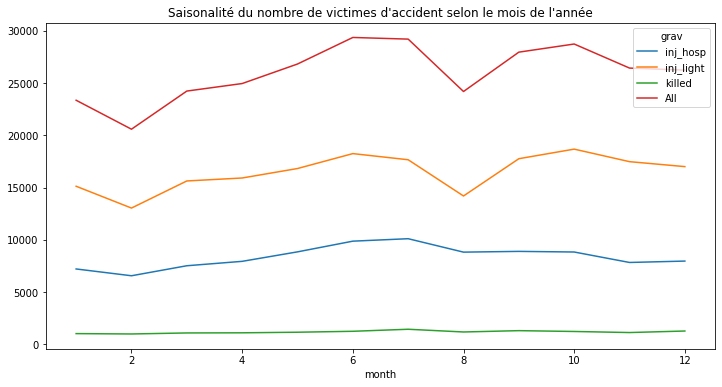

In [336]:
pd.crosstab(index=victims['month'],
           columns=victims['grav'], 
           margins=True)\
    .drop(['All'], axis=0)\
    .plot.line(figsize=(12, 6), rot=0,
               title="Saisonalité du nombre de victimes d'accident selon le mois de l'année")

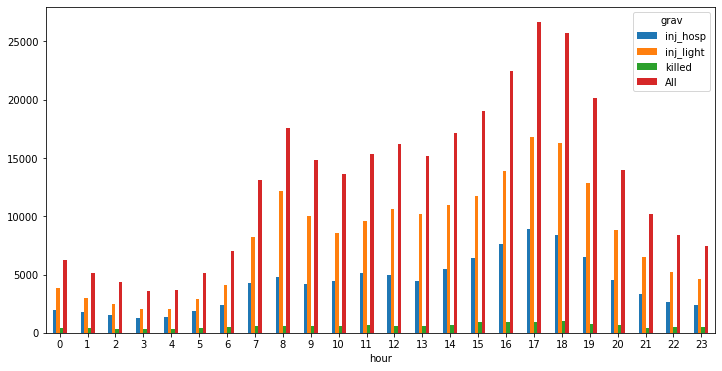

In [337]:
pd.crosstab(index=victims['hour'],
           columns=victims['grav'], 
           margins=True)\
    .drop(['All'], axis=0)\
    .plot.bar(stacked=False, figsize=(12, 6), rot=0)

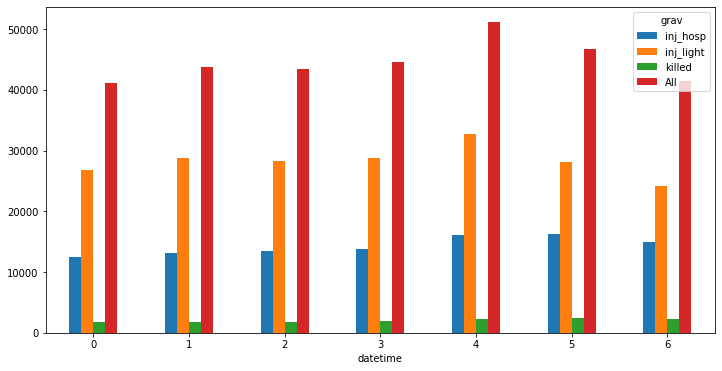

In [338]:
pd.crosstab(index=victims['datetime'].dt.weekday,
           columns=victims['grav'], 
           margins=True)\
    .drop(['All'], axis=0)\
    .plot.bar(stacked=False, figsize=(12, 6), rot=0)

#### Evolution du nombre quotidien de victimes d'accidents au fil de l'année

In [68]:
pd.crosstab(index=victims['datetime'].dt.strftime('%m %d'),
           columns=victims['year'])\
    .rolling(10).mean()\
    .plot.line(backend='plotly', 
               labels={
                   'year': 'Années',
                   'value': "Nb victimes/jour (MA10)",
               },
               title="Evolution du nombre (lissé) quotidien de victimes d'accidents au fil de l'année")

#### Evolution du nombre quotidien d'accidents

In [217]:
def build_accidents_count(caracs, users):
    victims = acc.build_victims_dataset(caracs, users)

    victims['date'] = victims['datetime'].dt.date

    victims_by_date = victims.groupby(by=['date']).count().reset_index()\
        .loc[:, ['date', 'Num_Acc']].rename({'Num_Acc': 'nb_victims'}, axis=1)

    acc_cnt_by_date = victims.groupby(by=['date', 'Num_Acc']).count().reset_index()\
        .groupby(by=['date']).count().reset_index()\
        .loc[:, ['date', 'Num_Acc']].rename({'Num_Acc': 'nb_accidents'}, axis=1)

    accidents_by_date = pd.merge(acc_cnt_by_date, victims_by_date, on='date')
    accidents_by_date['date'] = accidents_by_date['date'].astype('datetime64')
    accidents_by_date['victs_per_acc'] = accidents_by_date['nb_victims'] / accidents_by_date['nb_accidents']
    accidents_by_date['weekday'] = accidents_by_date['date'].dt.weekday
    
    return accidents_by_date

accidents_by_date = build_accidents_count(caracs, users)

In [207]:
import datetime as dt

def plot_acc_by_year(accidents_by_date, year, columns, window=7, **kwargs):
    df = accidents_by_date.loc[accidents_by_date['date'].dt.year == year, :]
    
    df.loc[:, columns] = df.loc[:, columns].rolling(window).mean()
    fig = df.plot.line(backend='plotly', x='date', y=columns, **kwargs)
    
    return fig
    
plot_acc_by_year(accidents_by_date, 2018, ['nb_victims', 'nb_accidents'])

c:\users\thomas.marquis\.conda\envs\secu_route\lib\site-packages\pandas\core\indexing.py:1715: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [221]:
plot_acc_by_year(accidents_by_date, 2019, ['victs_per_acc'], window=1, hover_data=['value', 'date', 'weekday'])

c:\users\thomas.marquis\.conda\envs\secu_route\lib\site-packages\pandas\core\indexing.py:1715: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Le nombre de victimes par accident semble plus élevé le dimanche.

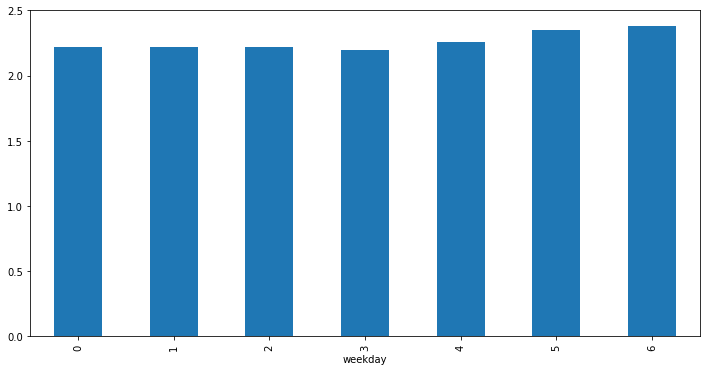

In [341]:
def build_acc_by_weekday(accidents_by_date, year):
    accidents_by_date['weekday'] = accidents_by_date['date'].dt.weekday
    acc_by_weekday = accidents_by_date.loc[accidents_by_date['date'].dt.year == year, :].groupby(by=['weekday']).sum()
    acc_by_weekday['victs_per_acc'] = acc_by_weekday['nb_victims'] / acc_by_weekday['nb_accidents']
    
    return acc_by_weekday

acc_by_weekday = build_acc_by_weekday(accidents_by_date, 2019)
acc_by_weekday['victs_per_acc'].plot.bar(figsize=(12, 6))

#### La gravité des accidents varient selon l'heure de la journée

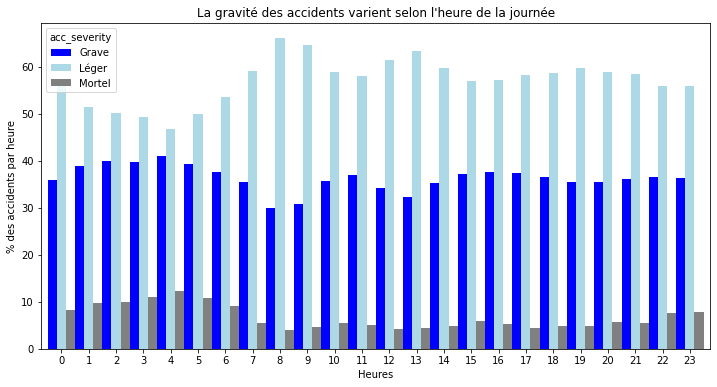

In [342]:
acc_severity = pd.read_csv('../data/interim/accidents/acc_severity.csv',
                           index_col=0, header=0,
                           dtype={'acc_severity': 'category', 'Num_Acc': 'string'})
accidents = pd.merge(caracs, acc_severity, on='Num_Acc')

acc_by_hour = accidents.groupby(by=['hour', 'acc_severity']).count().reset_index()
acc_by_hour = pd.crosstab(index=acc_by_hour['hour'], 
            columns=acc_by_hour['acc_severity'], 
            values=acc_by_hour['Num_Acc'],
            aggfunc=sum,
            normalize=0).mul(100)
acc_by_hour.rename({
        'inj_hosp': 'Grave',
        'inj_light': 'Léger',
        'killed': 'Mortel',
    }, axis=1)\
    .plot.bar(figsize=(12, 6), stacked=False, rot=0,
              color=['blue', 'lightblue', 'grey'], width=1,
              ylabel='% des accidents par heure', xlabel='Heures', 
             title="La gravité des accidents varient selon l'heure de la journée")

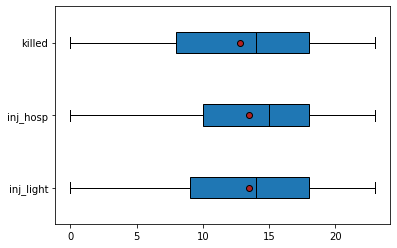

<Figure size 432x288 with 0 Axes>

In [349]:
viz.plot_box_cat(accidents, 'acc_severity', 'hour')

### Quels sont les types de trajet les plus dangereux ?

## Liste des features

On peut prédire la gravité d'un accident en fonction :

- du sex du conducteur
- de la période de l'année
- du jour de la semaine
- de l'heure de la journée
- du type de trajet (pro, domicile-travail...)